## Setep 4: Feature Engineering

### 4-1: Add more features to Dataset
#### 4-1-1: Number of Charecters
#### 4-1-2: Number of Words
#### 4-1-3: Number of Capital Characters
#### 4-1-4: Number of Capital Words
#### 4-1-5: Number of Punctuations
#### 4-1-6: Number of Words in quotes
#### 4-1-7: Number of Sentences
#### 4-1-8: Number of Unique Words
#### 4-1-9: Number of Stopwords
#### 4-1-10: Average of Word Lenght
#### 4-1-11: Average of Sentence Lenght
#### 4-1-12: Unique Words / Number of Words
#### 4-1-13: Stopwords / Number of Words
#### 4-1.14: Sentiment Analyzer using NLTK


In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

def remove_URL(text):
    """Remove URL from the input Text"""
    return re.sub(r"http\S+", "", text)

def find_WrCapital(text):
    valid_Capital = ['INFP ', 'INFJ ', 'INTP ', 'INTJ ', 'ENTP ', 'ENFP ', 'ISTP ', 'ISFP ', 'ENTJ ', 'ISTJ ', 'ENFJ ', 'ISFJ ', 'ESTP ', 'ESFP ', 'ESFJ ', 'ESTJ ', 'MBTI ']
    match= re.findall('[A-Z]{3,15}\s{1}', text)
    match = [item for item in match if item not in valid_Capital]
    return(len(match))

def find_ChCapital(text):
    count = 0
    for i in text:
        if i.isupper():
            count+=1
    return count

def count_Punctuations(text):
    punctuations="!#$%&'()*+,-./:;<=>?@[\]^_`{}~" + '"'
    d=0
    for i in punctuations:
        d+=text.count(i)
    return d 

def count_Words_in_quotes(text):
    x = re.findall(r"(?P<quote>['\"])(?P<string>.*?)(?<!\\)(?P=quote)", text)
    return len(x)

def count_Sentences(text):
    return len(nltk.sent_tokenize(text))

def count_UniqueWords(text):
    text = re.sub(r'[^\w\s]','',text) #Remove Punctuations
    return len(set(text.split()))

def count_Stopwords(text):
    stop_Words = set(stopwords.words('english'))  
    word_Tokens = word_tokenize(text)
    stopwords_X = [w for w in word_Tokens if w in stop_Words]
    return len(stopwords_X)

def sentiment_Score(text):
    sia = SentimentIntensityAnalyzer()
    return(sia.polarity_scores(text).get('compound'))




mbti_FE = mbti_Dataset[['Type', 'Posts', 'IE', 'NS', 'FT', 'PJ']].copy()
mbti_FE['No_Characters'] = mbti_FE['Posts'].apply(lambda X: len(remove_URL(X)) - remove_URL(X).count(' '))
mbti_FE['No_Words'] = mbti_FE['Posts'].apply(lambda X: len(remove_URL(X).split()))
mbti_FE['No_Char-Capital'] = mbti_FE['Posts'].apply(lambda X: find_ChCapital(remove_URL(X)))
mbti_FE['No_Words-Capital'] = mbti_FE['Posts'].apply(lambda X: find_WrCapital(remove_URL(X)))
mbti_FE['No_Punctuations'] = mbti_FE['Posts'].apply(lambda X: count_Punctuations(remove_URL(X)))
mbti_FE['No_WordsInQuotes'] = mbti_FE['Posts'].apply(lambda X: count_Words_in_quotes(remove_URL(X)))
mbti_FE['No_Sentences'] = mbti_FE['Posts'].apply(lambda X: count_Sentences(remove_URL(X)))
mbti_FE['No_UniqueWords'] = mbti_FE['Posts'].apply(lambda X: count_UniqueWords(remove_URL(X)))
mbti_FE['No_Stopwords'] = mbti_FE['Posts'].apply(lambda X: count_Stopwords(remove_URL(X)))
mbti_FE['Avg_WordLength'] = mbti_FE['No_Characters']/mbti_FE['No_Words']
mbti_FE['Avg_SentLength'] = mbti_FE['No_Words']/mbti_FE['No_Sentences']
mbti_FE['UniqueWrd_vs_NoWrd'] = mbti_FE['No_UniqueWords']/mbti_FE['No_Words']
mbti_FE['Stopwords_vs_NoWrd'] = mbti_FE['No_Stopwords']/mbti_FE['No_Words']
mbti_FE['Sentiment_Score'] = mbti_FE['Posts'].apply(lambda X: sentiment_Score(remove_URL(X)))

mbti_FE.head()

,Type,Posts,IE,NS,FT,PJ,No_Characters,No_Words,No_Char-Capital,No_Words-Capital,No_Punctuations,No_WordsInQuotes,No_Sentences,No_UniqueWords,No_Stopwords,Avg_WordLength,Avg_SentLength,UniqueWrd_vs_NoWrd,Stopwords_vs_NoWrd,Sentiment_Score
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...,I,N,F,J,2760,548,73,0,141,9,24,355,238,5.036496,22.833333,0.647810,0.434307,0.9805
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...,E,N,T,P,5241,1166,312,1,287,26,81,545,484,4.494854,14.395062,0.467410,0.415094,0.9993
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...",I,N,T,P,4168,833,151,2,227,15,41,463,338,5.003601,20.317073,0.555822,0.405762,0.9983
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...",I,N,T,J,5071,1062,245,3,294,28,67,518,469,4.774953,15.850746,0.487759,0.441620,0.9974
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...,E,N,T,J,4717,965,201,5,232,14,65,500,436,4.888083,14.846154,0.518135,0.451813,0.9396


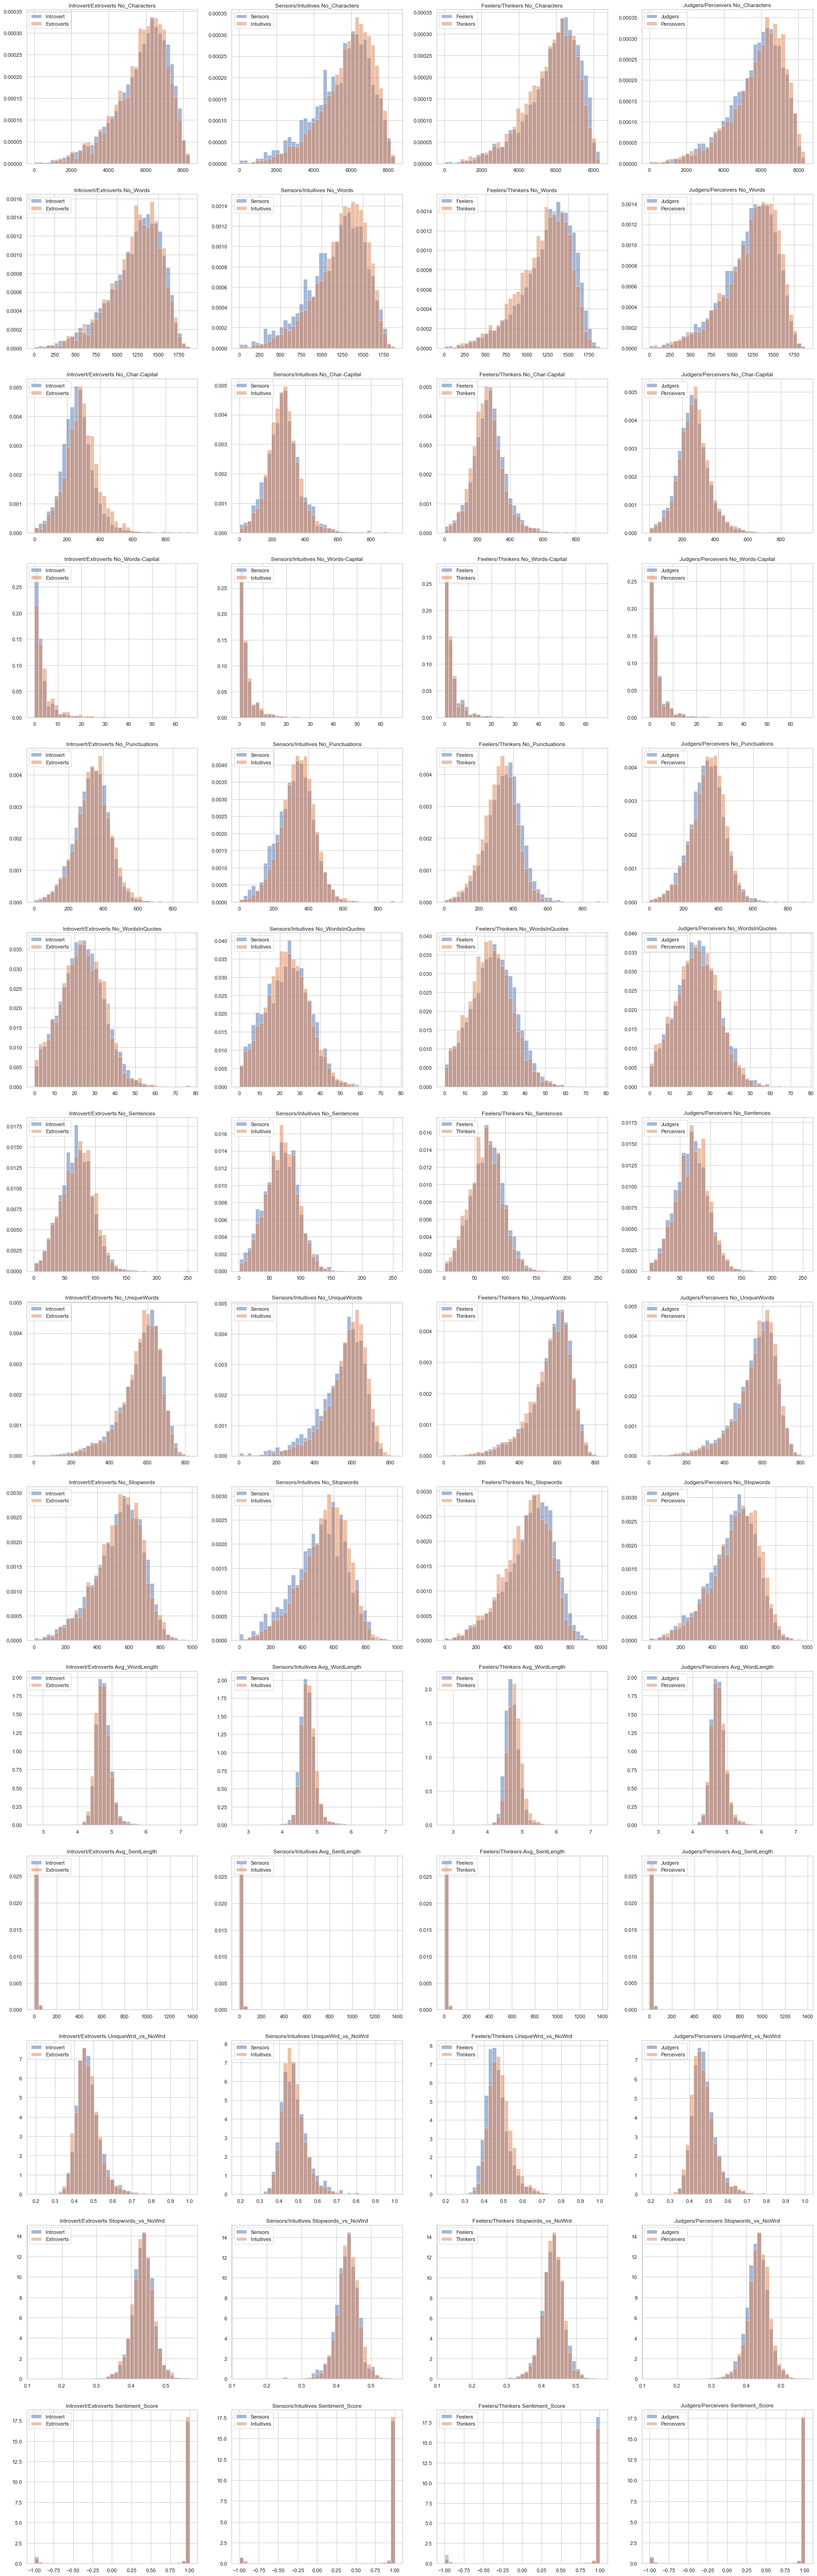

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

feature_List = ['No_Characters', 'No_Words', 'No_Char-Capital', 'No_Words-Capital', 'No_Punctuations', 'No_WordsInQuotes', 'No_Sentences', 'No_UniqueWords', 'No_Stopwords', 'Avg_WordLength', 'Avg_SentLength', 'UniqueWrd_vs_NoWrd', 'Stopwords_vs_NoWrd','Sentiment_Score']

fig, ax = plt.subplots(len(feature_List),4, figsize=(30,100))

for i, feature in enumerate(feature_List):
    bins = np.linspace(mbti_FE[feature].min(), mbti_FE[feature].max(), 40)
    ax[i,0].hist(mbti_FE[mbti_FE['IE'] == 'I'][feature], bins, alpha = 0.5, density=True, label = 'Introvert')
    ax[i,0].hist(mbti_FE[mbti_FE['IE'] == 'E'][feature], bins, alpha = 0.5, density=True, label = 'Extroverts')
    ax[i,0].legend(loc='upper left')
    ax[i,0].title.set_text('Introvert/Extroverts ' + feature)

    ax[i,1].hist(mbti_FE[mbti_FE['NS'] == 'S'][feature], bins, alpha = 0.5, density=True, label = 'Sensors')
    ax[i,1].hist(mbti_FE[mbti_FE['NS'] == 'N'][feature], bins, alpha = 0.5, density=True, label = 'Intuitives')
    ax[i,1].legend(loc='upper left')
    ax[i,1].title.set_text('Sensors/Intuitives ' + feature)

    ax[i,2].hist(mbti_FE[mbti_FE['FT'] == 'F'][feature], bins, alpha = 0.5, density=True, label = 'Feelers')
    ax[i,2].hist(mbti_FE[mbti_FE['FT'] == 'T'][feature], bins, alpha = 0.5, density=True, label = 'Thinkers')
    ax[i,2].legend(loc='upper left')
    ax[i,2].title.set_text('Feelers/Thinkers ' + feature)

    ax[i,3].hist(mbti_FE[mbti_FE['PJ'] == 'P'][feature], bins, alpha = 0.5, density=True, label = 'Judgers')
    ax[i,3].hist(mbti_FE[mbti_FE['PJ'] == 'J'][feature], bins, alpha = 0.5, density=True, label = 'Perceivers')
    ax[i,3].legend(loc='upper left')
    ax[i,3].title.set_text('Judgers/Perceivers ' + feature)

plt.show()


Box-Cox Power Transformation

In [23]:
#import matplotlib.pyplot as plt
#for i in [1,2,3,4,5]:
#    plt.hist((mbti_FE['No_Characters'])**(1/i), bins=40)
#    plt.title('Transformation: 1/{}'.format(str(i)))
#    plt.show()
print("I don't know if I should do trasformation or not")

I don't know if I should do trasformation or not


In [24]:
#Save information from prevous steps
import pandas as pd
import numpy as np
from scipy import sparse

mbti_FE.to_csv('mbti_FE.csv')
mbti_Dataset.to_csv('mbti_Dataset.csv')
sparse.save_npz('full_Lem_CV.npz', full_Lem_CV)
sparse.save_npz('full_Lem_Ngram.npz', full_Lem_Ngram)
sparse.save_npz('full_Lem_tfidf.npz', full_Lem_tfidf)

#np.save('full_Lem_CV', full_Lem_CV.toarray())
#np.save('full_Lem_Ngram', full_Lem_Ngram.toarray())
#np.save('full_Lem_tfidf', full_Lem_tfidf.toarray())